<a href="https://colab.research.google.com/github/arduinojinarendra/arduino/blob/main/wayabledist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

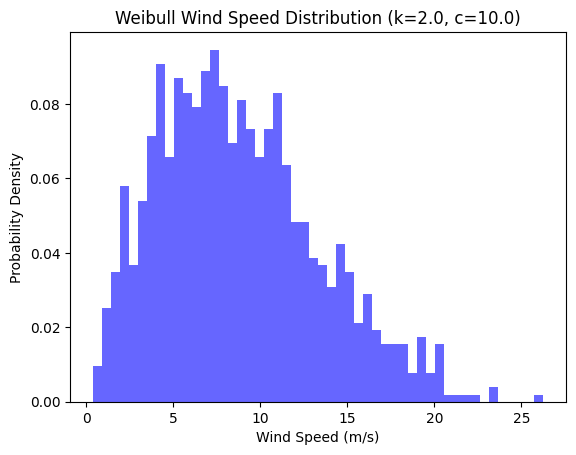

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for the Weibull distribution
k = 2.0  # Shape parameter
c = 10.0  # Scale parameter (typically in meters per second)

# Define the number of data points you want to generate
num_points = 1000

# Generate random wind speed data points using the Weibull distribution
wind_speeds = c * np.random.weibull(k, num_points)

# Plot a histogram to visualize the wind speed distribution
plt.hist(wind_speeds, bins=50, density=True, alpha=0.6, color='b')

# Add labels and title to the plot
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.title(f'Weibull Wind Speed Distribution (k={k}, c={c})')

# Show the plot
plt.show()


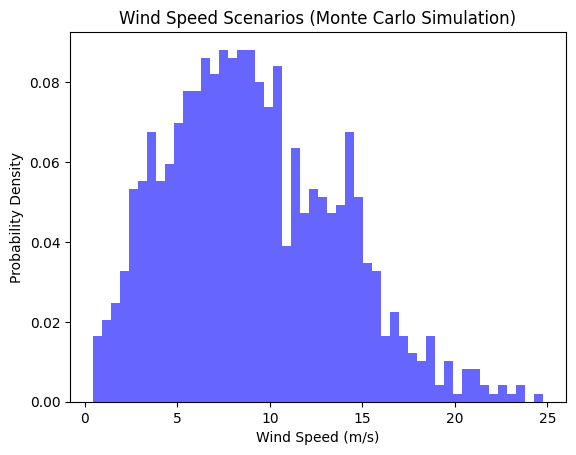

[ 4.35735277 16.1780719  16.7485925   6.78193232 10.35639491 10.63323282
  9.40452684 15.91902226 14.80470673  8.648844    3.23262092  7.78464751
  3.49733038 12.93348012 14.4553627   1.01833262  8.8980952   5.65919949
  2.67773305  7.75998707  6.71107994 14.30344636 11.16905516  8.75285434
  4.57002217 13.89042932  7.35994303  6.74042449  8.85709001 14.01237829
  3.75762707 11.62288868 11.63767034  2.97213227 10.58365567  4.92145214
 10.34464567  7.37369903 11.24702449  3.58343764 14.46621848 21.03081176
  5.88126287  3.69019003  9.4989057  13.34764717 15.46681926 10.47528795
  6.87362814  7.41180344  4.04658399  2.28579683  7.94514516 13.26483871
 15.25920767  4.96016297  6.49780423  8.93141831  8.63470268 11.80526735
  6.22029102  9.38302031 21.84953932 11.4607655   8.32621532 12.0406608
  1.30320963  7.810993   12.3959252   9.00156344 14.42098901 11.15423144
  3.62047319  4.35667242 10.10064452  8.10197237  3.3642632   7.77868503
 10.9325307  14.91911479 12.12318991  8.62180483  6.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Weibull distribution
k = 2.0  # Shape parameter
c = 10.0  # Scale parameter (typically in meters per second)

# Number of scenarios to generate
num_scenarios = 1000

# Initialize an array to store wind speed scenarios
wind_speeds = np.zeros(num_scenarios)

# Monte Carlo simulation to generate wind speed scenarios
for i in range(num_scenarios):
    # Generate a random sample from the Weibull distribution
    wind_speed = c * np.random.weibull(k)
    wind_speeds[i] = wind_speed

# Plot a histogram to visualize the wind speed scenarios
plt.hist(wind_speeds, bins=50, density=True, alpha=0.6, color='b')

# Add labels and title to the plot
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.title(f'Wind Speed Scenarios (Monte Carlo Simulation)')

# Show the plot
plt.show()
print(wind_speeds)

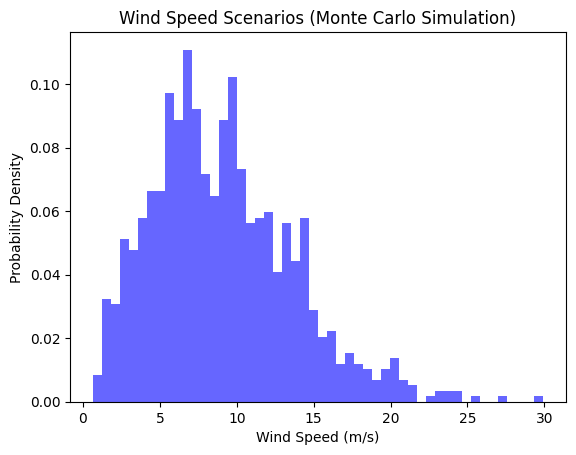

In [ ]:
import numpy as np
import pandas as pd

# Parameters for the Weibull distribution
k = 2.0  # Shape parameter
c = 10.0  # Scale parameter (typically in meters per second)

# Number of scenarios to generate
num_scenarios = 1000

# Initialize an array to store wind speed scenarios
wind_speeds = np.zeros(num_scenarios)

# Monte Carlo simulation to generate wind speed scenarios
for i in range(num_scenarios):
    # Generate a random sample from the Weibull distribution
    wind_speed = c * np.random.weibull(k)
    wind_speeds[i] = wind_speed

# Create a DataFrame from the wind_speeds array
df = pd.DataFrame({'Wind_Speed (m/s)': wind_speeds})

# Save the DataFrame as a CSV file named 'valid.csv'
df.to_csv('valid.csv', index=False)

# Plot a histogram to visualize the wind speed scenarios
import matplotlib.pyplot as plt

plt.hist(wind_speeds, bins=50, density=True, alpha=0.6, color='b')

# Add labels and title to the plot
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.title(f'Wind Speed Scenarios (Monte Carlo Simulation)')

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Load your time series data into a Pandas DataFrame
data = pd.read_csv('valid.csv')

# Extract the values to be forecasted
values = data['Wind_Speed (m/s)'].values


In [ ]:
scaler = MinMaxScaler()
values = scaler.fit_transform(values.reshape(-1, 1))


In [ ]:
sequence_length = 10  # Number of time steps to consider for each input sequence

X = []
y = []

for i in range(len(values) - sequence_length):
    X.append(values[i:i+sequence_length])
    y.append(values[i+sequence_length])

X = np.array(X)
y = np.array(y)


In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0245
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0247
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0249
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0245
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0248
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0247
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0246
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0245
Epoch 12/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0245
Epoch 13/100
13/13 [=================

In [ ]:
y_pred = model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate the performance metrics (e.g., RMSE, MAE, etc.) to evaluate the model


7/7 [==============================] - 0s 5ms/step


In [ ]:
# Create a sequence of recent data
recent_data = values[-sequence_length:]

# Forecast the next 'n' time steps
n = 100
forecasts = []

for _ in range(n):
    forecast = model.predict(recent_data.reshape(1, sequence_length, 1))
    forecasts.append(forecast[0, 0])

    # Update the recent data with the forecasted value and shift the sequence
    recent_data = np.append(recent_data[1:], forecast)

# Inverse transform the forecasts to the original scale
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))


1/1 [==============================] - 0s 22ms/step


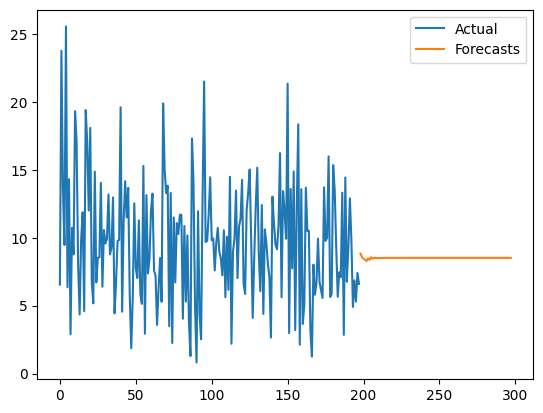

In [ ]:
plt.plot(y_test_original, label='Actual')
plt.plot(range(len(y_test_original), len(y_test_original) + n), forecasts, label='Forecasts')
plt.legend()
plt.show()


Epoch 1/50
250/250 [==============================] - 4s 7ms/step - loss: 0.0284
Epoch 2/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0170
Epoch 3/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0170
Epoch 4/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0169
Epoch 5/50
250/250 [==============================] - 2s 9ms/step - loss: 0.0169
Epoch 6/50
250/250 [==============================] - 2s 7ms/step - loss: 0.0168
Epoch 7/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0168
Epoch 8/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0167
Epoch 9/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0169
Epoch 10/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0168
Epoch 11/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0170
Epoch 12/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0168
Epoch 13/50
250/250 [====

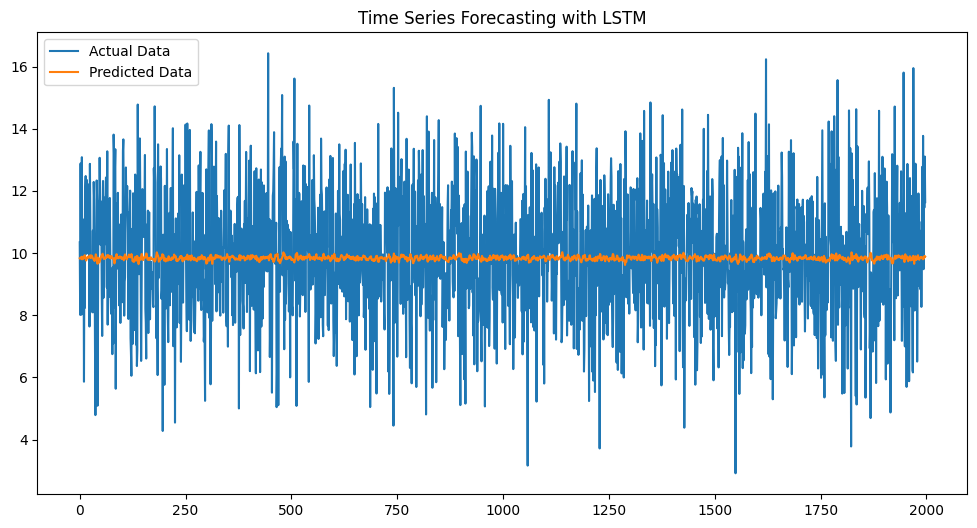

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load your time series data into a Pandas DataFrame
data = pd.read_csv('/content/wind_speed_scenarios (1).csv')

# Extract the values to be forecasted
values = data['0'].values

# Normalize the data
scaler = MinMaxScaler()
values = scaler.fit_transform(values.reshape(-1, 1))

# Define the number of time steps to use for prediction
look_back = 10

# Create input and target sequences
X, y = [], []
for i in range(len(values) - look_back):
    X.append(values[i:i+look_back, 0])
    y.append(values[i+look_back, 0])

X, y = np.array(X), np.array(y)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions to get them in the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs. predicted data
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Data')
plt.plot(y_pred, label='Predicted Data')
plt.legend()
plt.title('Time Series Forecasting with LSTM')
plt.show()


In [ ]:
import numpy as np

# Calculate the RMSE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

print(f'Root Mean Square Error (RMSE): {rmse}')


Root Mean Square Error (RMSE): 2.0365262713300485


In [ ]:
import pandas as pd

# Load your data
data = pd.read_csv('valid.csv')

# Check the column names
print(data.columns)


Index(['Wind_Speed (m/s)'], dtype='object')


Epoch 1/50
25/25 - 0s - loss: 0.0589 - val_loss: 0.0494 - 438ms/epoch - 18ms/step
Epoch 2/50
25/25 - 0s - loss: 0.0544 - val_loss: 0.0464 - 57ms/epoch - 2ms/step
Epoch 3/50
25/25 - 0s - loss: 0.0503 - val_loss: 0.0439 - 59ms/epoch - 2ms/step
Epoch 4/50
25/25 - 0s - loss: 0.0470 - val_loss: 0.0421 - 63ms/epoch - 3ms/step
Epoch 5/50
25/25 - 0s - loss: 0.0442 - val_loss: 0.0407 - 57ms/epoch - 2ms/step
Epoch 6/50
25/25 - 0s - loss: 0.0420 - val_loss: 0.0396 - 46ms/epoch - 2ms/step
Epoch 7/50
25/25 - 0s - loss: 0.0401 - val_loss: 0.0386 - 45ms/epoch - 2ms/step
Epoch 8/50
25/25 - 0s - loss: 0.0385 - val_loss: 0.0378 - 43ms/epoch - 2ms/step
Epoch 9/50
25/25 - 0s - loss: 0.0372 - val_loss: 0.0371 - 65ms/epoch - 3ms/step
Epoch 10/50
25/25 - 0s - loss: 0.0360 - val_loss: 0.0363 - 60ms/epoch - 2ms/step
Epoch 11/50
25/25 - 0s - loss: 0.0349 - val_loss: 0.0356 - 44ms/epoch - 2ms/step
Epoch 12/50
25/25 - 0s - loss: 0.0339 - val_loss: 0.0348 - 59ms/epoch - 2ms/step
Epoch 13/50
25/25 - 0s - loss: 0.03

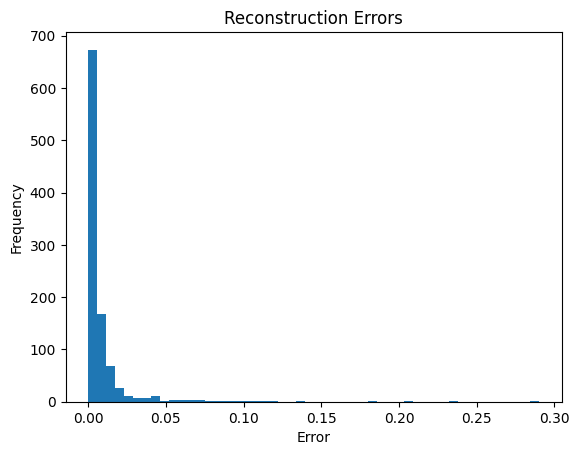

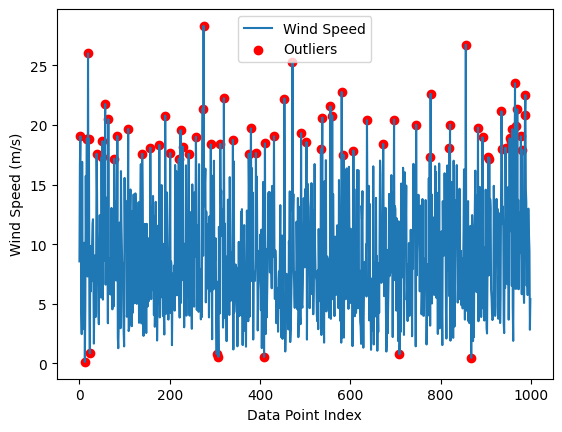

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load and preprocess your data
data = pd.read_csv('valid.csv')
values = data['Wind_Speed (m/s)'].values
scaler = MinMaxScaler()
values = scaler.fit_transform(values.reshape(-1, 1))

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoder = Dense(8, activation='relu')(input_layer)
decoder = Dense(1, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the normal data
autoencoder.fit(values, values, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Calculate reconstruction errors on the entire dataset
reconstruction_errors = np.mean(np.square(values - autoencoder.predict(values)), axis=1)

# Set a threshold to identify outliers
threshold = 0.02  # Adjust this threshold as needed

# Identify outliers based on the threshold
outliers = data[reconstruction_errors > threshold]

# Visualize the reconstruction errors (optional)
plt.hist(reconstruction_errors, bins=50)
plt.title('Reconstruction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Visualize the outliers (optional)
plt.plot(data['Wind_Speed (m/s)'], label='Wind Speed')
plt.scatter(outliers.index, outliers['Wind_Speed (m/s)'], color='red', label='Outliers')
plt.xlabel('Data Point Index')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

# Load your data
data = pd.read_csv('valid.csv')

# Define the feature(s) for KNN (you can use multiple features if needed)
X = data[['Wind_Speed (m/s)']]

# Choose the number of neighbors (k)
k = 5

# Fit the KNN model
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X)

# Calculate the distances to the k-nearest neighbors for each data point
distances, _ = knn.kneighbors(X)

# Set a threshold to classify outliers
threshold = 0.2  # Adjust this threshold as needed

# Create a new column 'Outlier' in the dataset to store the labels (1 for outliers, 0 for inliers)
data['Outlier'] = [1 if d > threshold else 0 for d in distances]

# Display the data with the 'Outlier' column
print(data)


TypeError: ignored

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = 'wind_dataset.csv'  # Make sure this matches the actual file name in your Colab environment
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:

df.tail()


,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5
6573,1978-12-31,19.25,0,0.5,0.0,1.2,1.0,-1.5,-3.0


In [ ]:
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [ ]:
df['WIND'].min()

0.0

In [ ]:
df['DATE'][df['WIND']=='0']

Series([], Name: DATE, dtype: object)

In [ ]:
df.fillna(0,inplace=True)
df['WIND'].mean()

9.796834499543657

In [ ]:
import pandas as pd

# Load data from the Excel file
data = pd.read_excel('Wind speed dataset.xlsx')

# Save the data as a CSV file
data.to_csv('wind_speed_data.csv', index=False)


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = 'wind_speed_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Year,Month,Day,Hour,Minute,wind speed (m/s)
0,2019,1,1,0,0,14.569
1,2019,1,1,0,5,14.908
2,2019,1,1,0,10,15.173
3,2019,1,1,0,15,15.149
4,2019,1,1,0,20,15.228


In [ ]:
df.tail

<bound method NDFrame.tail of        Year  Month  Day  Hour  Minute  wind speed (m/s)
0      2019      1    1     0       0            14.569
1      2019      1    1     0       5            14.908
2      2019      1    1     0      10            15.173
3      2019      1    1     0      15            15.149
4      2019      1    1     0      20            15.228
...     ...    ...  ...   ...     ...               ...
35419  2019     10   31    23      35             3.534
35420  2019     10   31    23      40             3.549
35421  2019     10   31    23      45             3.543
35422  2019     10   31    23      50             3.540
35423  2019     10   31    23      55             3.570

[35424 rows x 6 columns]>

In [ ]:
data = pd.read_csv('wind_speed_data.csv')

# Calculate the index to split the data into training and testing
split_index = int(0.8 * len(data))

# Split the data into training and testing
train_data = data[:split_index]
test_data = data[split_index:]

# Save the training and testing data as separate CSV files if needed
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('wind_speed_data.csv')


In [ ]:
# Extract wind speed data
wind_speeds = data['wind speed (m/s)'].values

# Normalize wind speed data
scaler = MinMaxScaler()
wind_speeds = scaler.fit_transform(wind_speeds.reshape(-1, 1))


In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Set the sequence length and create sequences
sequence_length = 10
X_train, y_train = create_sequences(wind_speeds, sequence_length)


In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1107/1107 [==============================] - 10s 8ms/step - loss: 0.0025
Epoch 2/10
1107/1107 [==============================] - 8s 8ms/step - loss: 6.3759e-04
Epoch 3/10
1107/1107 [==============================] - 7s 7ms/step - loss: 4.1421e-04
Epoch 4/10
1107/1107 [==============================] - 8s 8ms/step - loss: 2.9018e-04
Epoch 5/10
1107/1107 [==============================] - 7s 7ms/step - loss: 2.4367e-04
Epoch 6/10
1107/1107 [==============================] - 8s 8ms/step - loss: 2.3214e-04
Epoch 7/10
1107/1107 [==============================] - 8s 8ms/step - loss: 2.2761e-04
Epoch 8/10
1107/1107 [==============================] - 7s 7ms/step - loss: 2.2687e-04
Epoch 9/10
1107/1107 [==============================] - 9s 8ms/step - loss: 2.2116e-04
Epoch 10/10
1107/1107 [==============================] - 8s 7ms/step - loss: 2.2428e-04


1107/1107 [==============================] - 3s 3ms/step


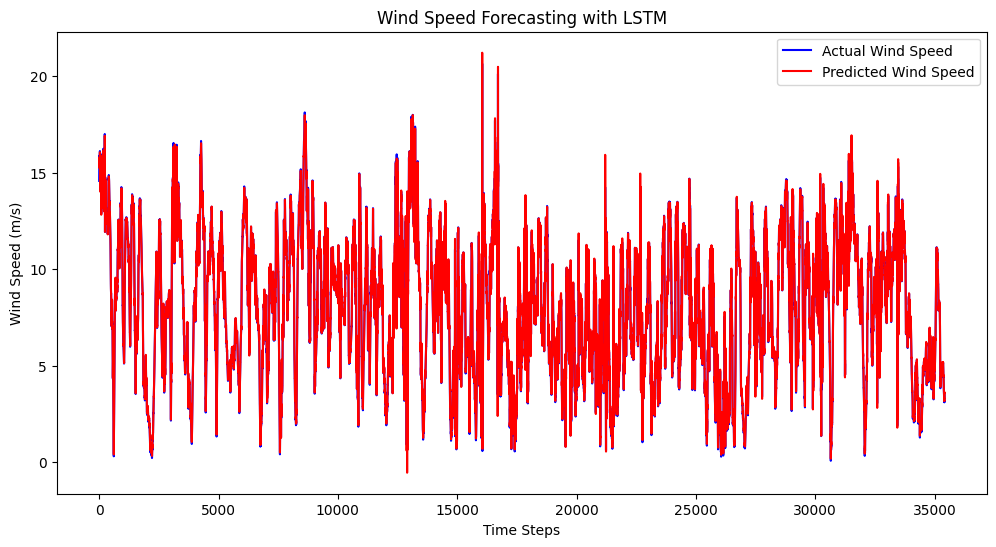

In [ ]:
# Create sequences for the testing data
X_test, y_test = create_sequences(wind_speeds, sequence_length)
y_pred = model.predict(X_test)

# Inverse transform the normalized predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)

# Plot the original and predicted wind speed values
plt.figure(figsize=(12, 6))
plt.plot(data['wind speed (m/s)'].values, label='Actual Wind Speed', color='blue')
plt.plot(np.arange(sequence_length, len(data)), y_pred, label='Predicted Wind Speed', color='red')
plt.title('Wind Speed Forecasting with LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()


In [ ]:
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(data['wind speed (m/s)'].values[sequence_length:], y_pred))
print(f'Root Mean Squared Error (RMSE) for LSTM predictions: {rmse:.2f}')


Root Mean Squared Error (RMSE) for LSTM predictions: 0.30


In [ ]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Create a simple autoencoder
input_dim = sequence_length  # Use the same sequence length as in the LSTM model
encoding_dim = 5  # You can adjust this dimension based on your data

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder using the training data
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/10
1107/1107 [==============================] - 5s 4ms/step - loss: 0.0138 - val_loss: 0.0012
Epoch 2/10
1107/1107 [==============================] - 4s 4ms/step - loss: 9.7503e-04 - val_loss: 8.7724e-04
Epoch 3/10
1107/1107 [==============================] - 4s 4ms/step - loss: 8.3839e-04 - val_loss: 7.9249e-04
Epoch 4/10
1107/1107 [==============================] - 3s 3ms/step - loss: 5.8922e-04 - val_loss: 4.9050e-04
Epoch 5/10
1107/1107 [==============================] - 3s 3ms/step - loss: 4.7247e-04 - val_loss: 4.6016e-04
Epoch 6/10
1107/1107 [==============================] - 3s 3ms/step - loss: 4.5859e-04 - val_loss: 4.5115e-04
Epoch 7/10
1107/1107 [==============================] - 4s 4ms/step - loss: 4.5074e-04 - val_loss: 4.4471e-04
Epoch 8/10
1107/1107 [==============================] - 3s 3ms/step - loss: 4.4370e-04 - val_loss: 4.3745e-04
Epoch 9/10
1107/1107 [==============================] - 3s 3ms/step - loss: 4.3495e-04 - val_loss: 4.2874e-04
Epoch 10/10
1107/1

1107/1107 [==============================] - 2s 2ms/step


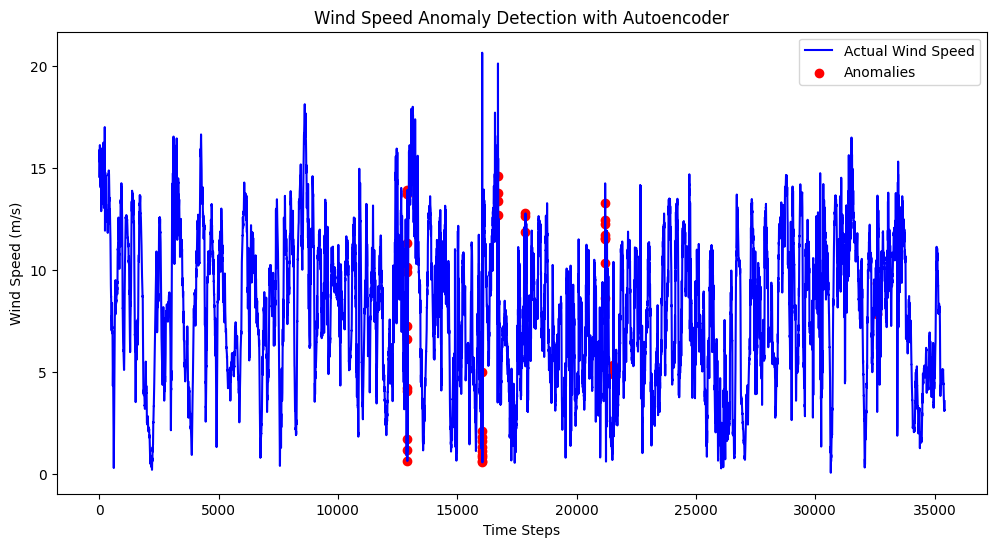

In [ ]:
# Use the autoencoder to make predictions
decoded_data = autoencoder.predict(X_test)

# Calculate the reconstruction error for each data point
reconstruction_errors = [mean_squared_error(X_test[i], decoded_data[i]) for i in range(len(X_test))]

# Set a threshold for anomaly detection (you can adjust this threshold)
threshold = 0.01

# Find anomalies
anomalies = [i for i, error in enumerate(reconstruction_errors) if error > threshold]

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['wind speed (m/s)'].values, label='Actual Wind Speed', color='blue')
plt.scatter(anomalies, data['wind speed (m/s)'].values[sequence_length:][anomalies], color='red', label='Anomalies')
plt.title('Wind Speed Anomaly Detection with Autoencoder')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()


Epoch 1/10
886/886 [==============================] - 10s 9ms/step - loss: 2.1001 - val_loss: 0.1173
Epoch 2/10
886/886 [==============================] - 7s 7ms/step - loss: 0.1054 - val_loss: 0.1054
Epoch 3/10
886/886 [==============================] - 8s 9ms/step - loss: 0.0805 - val_loss: 0.1123
Epoch 4/10
886/886 [==============================] - 7s 8ms/step - loss: 0.0763 - val_loss: 0.1127
Epoch 5/10
886/886 [==============================] - 8s 9ms/step - loss: 0.0755 - val_loss: 0.1178
Epoch 6/10
886/886 [==============================] - 7s 8ms/step - loss: 0.0747 - val_loss: 0.1084
Epoch 7/10
886/886 [==============================] - 8s 9ms/step - loss: 0.0743 - val_loss: 0.1123
Epoch 8/10
886/886 [==============================] - 8s 9ms/step - loss: 0.0732 - val_loss: 0.1233
Epoch 9/10
886/886 [==============================] - 7s 8ms/step - loss: 0.0724 - val_loss: 0.1124
Epoch 10/10
222/222 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE) f

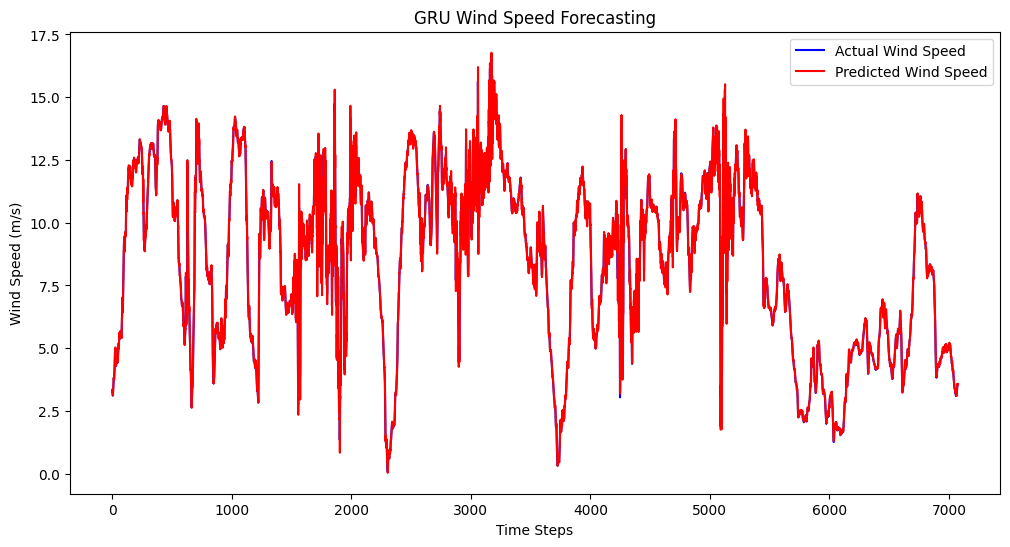

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the sequence length and other hyperparameters
sequence_length = 10
input_dim = 1  # We have only one feature: wind speed
hidden_units = 50  # Number of GRU units
output_dim = 1  # Single output (wind speed)

# Create sequences for input (X) and output (y)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Prepare the training and testing data
X_train, y_train = create_sequences(train_data['wind speed (m/s)'].values, sequence_length)
X_test, y_test = create_sequences(test_data['wind speed (m/s)'].values, sequence_length)

# Create and compile the GRU model
model = Sequential()
model.add(GRU(hidden_units, input_shape=(sequence_length, input_dim)))
model.add(Dense(output_dim))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Use the trained model for prediction
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) for GRU predictions: {rmse:.2f}')

# Visualize actual vs. predicted wind speed
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Wind Speed', color='blue')
plt.plot(y_pred, label='Predicted Wind Speed', color='red')
plt.title('GRU Wind Speed Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()
